# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [4]:
data['quality'].value_counts()

2    2198
1    1457
3     880
0     183
4     180
Name: quality, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [5]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

In [8]:
nfeatures = x_train.shape[1]

### (1) 모델1

In [14]:
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(4, activation = 'relu'),
                    Dense(5, activation = 'softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 96        
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 5)                 25        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')
hist = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100).history

Epoch 1/100
86/86 [==============================] - 1s 4ms/step - loss: 1.3068 - val_loss: 1.1719
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 1.2332 - val_loss: 1.1198
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1988 - val_loss: 1.0729
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 1.1579 - val_loss: 1.0503
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1299 - val_loss: 1.0178
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1232 - val_loss: 1.0109
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1167 - val_loss: 1.0100
Epoch 8/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1075 - val_loss: 0.9994
Epoch 9/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1049 - val_loss: 1.0034
Epoch 10/100
86/86 [==============================] - 0s 4ms/step - loss: 1.1051 - val_loss: 1.0116
Epoch 11/

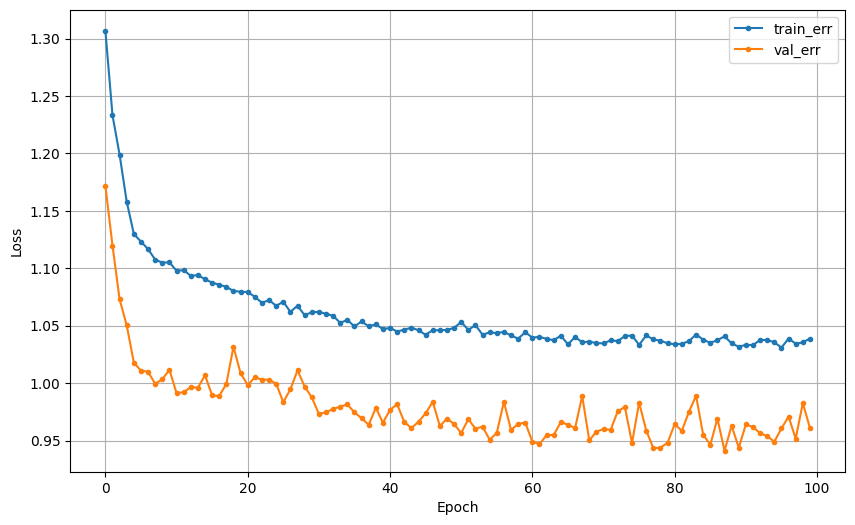

In [16]:
dl_history_plot(hist)

In [17]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

46/46 [==============================] - 0s 1ms/step


In [18]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[  2  44  15   0   0]
 [  0 289 146   3   0]
 [  0 170 459  31   0]
 [  0  10 192  48   0]
 [  0   1  46  14   0]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        61
           1       0.56      0.66      0.61       438
           2       0.53      0.70      0.60       660
           3       0.50      0.19      0.28       250
           4       0.00      0.00      0.00        61

    accuracy                           0.54      1470
   macro avg       0.52      0.32      0.31      1470
weighted avg       0.53      0.54      0.50      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
